#                               **Advanced Housing Prices**

# Importing Libraries and Loading Dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
base = pd.read_csv('train.csv')

# Basic Insepction

In [3]:
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
base.shape

(1460, 80)

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
base = base.drop('Id', axis = 1)

# EDA and Feature Engineering

In [7]:
num_col = base.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = base.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
# print("Number of categorical columns:", len(cat_col.columns))
# print("Number of numerical columns:", len(num_col.columns))

In [9]:
base[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [10]:
missing_values = base[num_col].isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values and their counts:")
print(missing_values)

Columns with missing values and their counts:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [11]:
base[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [12]:
num_mis = base[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [13]:
display(num_mis.head())

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


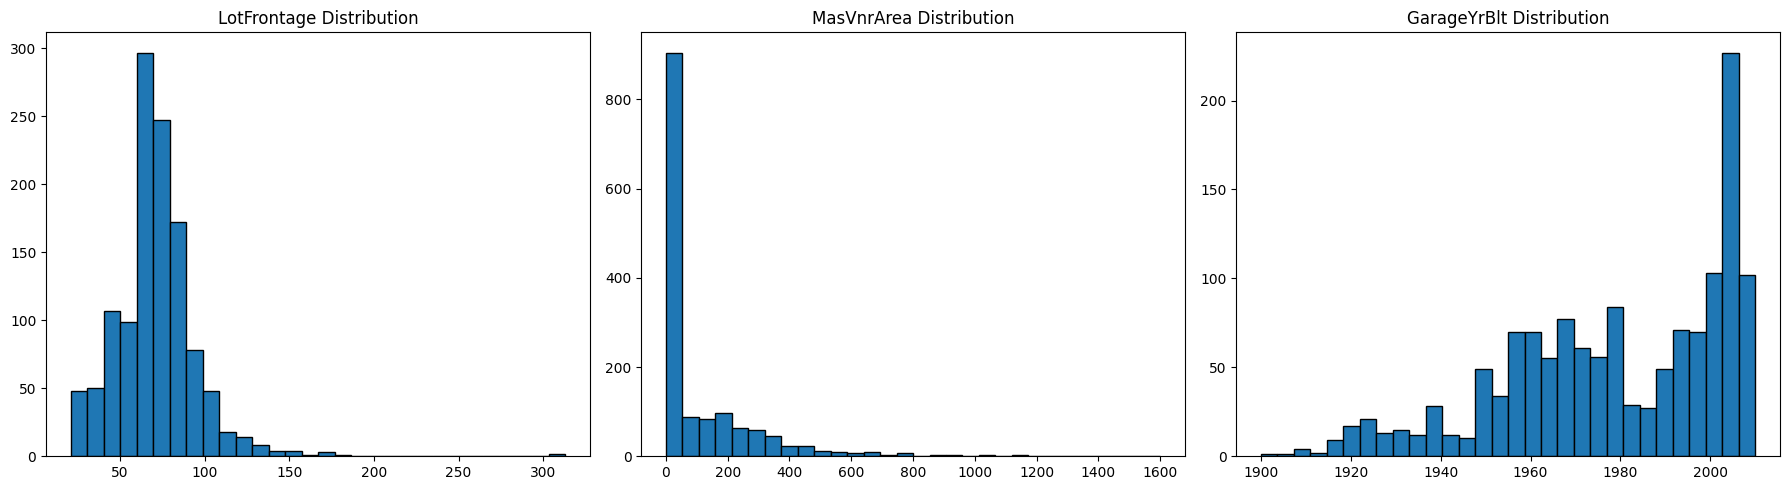

In [14]:
gifig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(num_mis['LotFrontage'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('LotFrontage Distribution')

axes[1].hist(num_mis['MasVnrArea'].dropna(), bins=30, edgecolor='black')
axes[1].set_title('MasVnrArea Distribution')

axes[2].hist(num_mis['GarageYrBlt'].dropna(), bins=30, edgecolor='black')
axes[2].set_title('GarageYrBlt Distribution')

plt.tight_layout()
plt.show()

In [15]:
num_mis.value_counts()

LotFrontage  MasVnrArea  GarageYrBlt
60.0         0.0         1950.0         9
                         1920.0         7
                         1940.0         7
73.0         0.0         2007.0         5
60.0         0.0         2005.0         5
                                       ..
65.0         108.0       2000.0         1
             144.0       2002.0         1
             196.0       2003.0         1
             220.0       1977.0         1
             0.0         1996.0         1
Name: count, Length: 955, dtype: int64

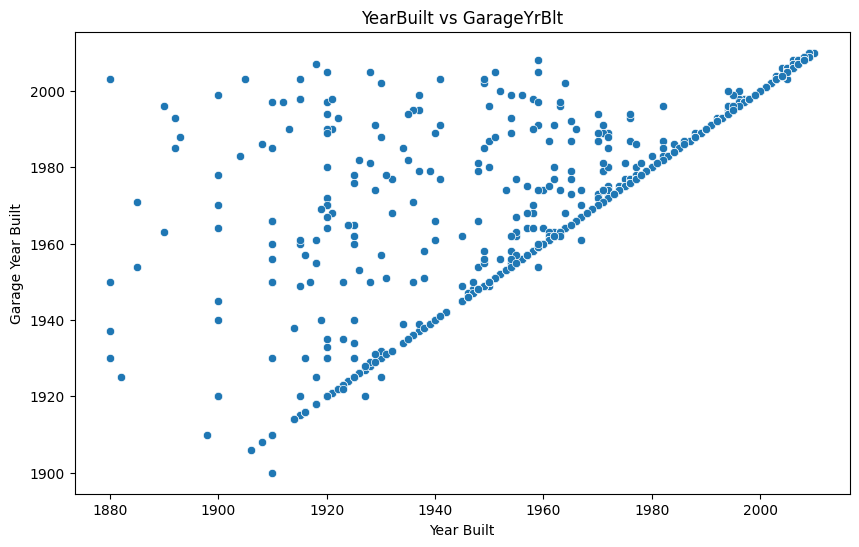

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='GarageYrBlt', data=base)
plt.title('YearBuilt vs GarageYrBlt')
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built')
plt.show()

In [17]:
correlation = base['YearBuilt'].corr(base['GarageYrBlt'])
print(f"The correlation between YearBuilt and GarageYrBlt is: {correlation}")

The correlation between YearBuilt and GarageYrBlt is: 0.8256674841743414


In [18]:
known = base[base['GarageYrBlt'].notnull()]
unknown = base[base['GarageYrBlt'].isnull()]

model = LinearRegression()
model.fit(known[['YearBuilt']], known['GarageYrBlt'])

base.loc[base['GarageYrBlt'].isnull(), 'GarageYrBlt'] = model.predict(unknown[['YearBuilt']])

In [19]:
base['LotFrontage'] = base['LotFrontage'].fillna(base['LotFrontage'].mean())

In [20]:
base['MasVnrArea'] = base['MasVnrArea'].fillna(base['MasVnrArea'].mode()[0])

In [21]:
missing_values = base[num_col].isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values and their counts:")
print(missing_values)

Columns with missing values and their counts:
Series([], dtype: int64)


In [22]:
missing_values_cat = base[cat_col].isnull().sum()
missing_values_cat = missing_values_cat[missing_values_cat > 0]
print("Columns with missing values and their counts:")
print(missing_values_cat)

Columns with missing values and their counts:
Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [23]:
base['Electrical'].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [24]:
fence_m = {'MnPrv': 1, 'GdPrv': 2, 'GdWo': 3, 'MnWw': 4}
base['Fence_Encoded'] = base['Fence'].map(fence_m).fillna(0).astype(int)

PoolQC_m = {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4}
base['PoolQC_Encoded'] = base['PoolQC'].map(PoolQC_m).fillna(0).astype(int)

fireplace_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0 }
base['FireplaceQu_Encoded'] = base['FireplaceQu'].map(fireplace_mapping).fillna(0).astype(int)

bsmt_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
base['BsmtQual_Encoded'] = base['BsmtQual'].map(bsmt_qual_mapping).fillna(0).astype(int)

bsmt_cond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
base['BsmtCond_Encoded'] = base['BsmtCond'].map(bsmt_cond_mapping).fillna(0).astype(int)

bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
base['BsmtExposure_Encoded'] = base['BsmtExposure'].map(bsmt_exposure_mapping).fillna(0).astype(int)

bsmt_fin_type1_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
base['BsmtFinType1_Encoded'] = base['BsmtFinType1'].map(bsmt_fin_type1_mapping).fillna(0).astype(int)

bsmt_fin_type2_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
base['BsmtFinType2_Encoded'] = base['BsmtFinType2'].map(bsmt_fin_type2_mapping).fillna(0).astype(int)

garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
base['GarageFinish_Encoded'] = base['GarageFinish'].map(garage_finish_mapping).fillna(0).astype(int)

garage_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
base['GarageQual_Encoded'] = base['GarageQual'].map(garage_qual_mapping).fillna(0).astype(int)

garage_cond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
base['GarageCond_Encoded'] = base['GarageCond'].map(garage_cond_mapping).fillna(0).astype(int)


In [25]:
base['Electrical'] = base['Electrical'].fillna(base['Electrical'].mode()[0])


In [26]:
base = pd.get_dummies(base, columns=['MasVnrType', 'MiscFeature', 'GarageType', 'Fence'], prefix=['MasVnrType', 'MiscFeature', 'GarageType', 'Fence'], dummy_na=True)


In [27]:
base = pd.get_dummies(base, columns = ['Alley'], prefix = ['Alley'], dummy_na = True)

In [28]:
columns_to_drop = ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                   'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']
base = base.drop(columns=columns_to_drop, axis=1)

In [29]:
cat_col = base.select_dtypes(include=['object', 'category']).columns.tolist()
missing_values_cat = base[cat_col].isnull().sum()
missing_values_cat = missing_values_cat[missing_values_cat > 0]
print("Columns with missing values and their counts:")
print(missing_values_cat)

Columns with missing values and their counts:
Series([], dtype: int64)


In [30]:
columns_for_onehot = ['PavedDrive', 'CentralAir', 'Heating', 'Foundation',
                      'Exterior1st', 'Exterior2nd', 'RoofMatl', 'RoofStyle',
                      'Condition1', 'Condition2', 'Neighborhood', 'Street',
                      'MSZoning', 'MSSubClass', 'BldgType']

base = pd.get_dummies(base, columns=columns_for_onehot, dummy_na=False)


In [31]:
# Label Encoding for Functional, KitchenQual, HeatingQC, ExterCond, ExterQual, LandSlope, LotConfig, Utilities, LandContour, Lotshape, HouseStyle
functional_mapping = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1}
base['Functional_Encoded'] = base['Functional'].map(functional_mapping).fillna(0).astype(int)

kitchenqual_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
base['KitchenQual_Encoded'] = base['KitchenQual'].map(kitchenqual_mapping).fillna(0).astype(int)

heatingqc_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
base['HeatingQC_Encoded'] = base['HeatingQC'].map(heatingqc_mapping).fillna(0).astype(int)

extercond_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
base['ExterCond_Encoded'] = base['ExterCond'].map(extercond_mapping).fillna(0).astype(int)

exterqual_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
base['ExterQual_Encoded'] = base['ExterQual'].map(exterqual_mapping).fillna(0).astype(int)

landcontour_mapping = {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0}
base['LandContour_Encoded'] = base['LandContour'].map(landcontour_mapping).fillna(0).astype(int)

lotshape_mapping = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
base['LotShape_Encoded'] = base['LotShape'].map(lotshape_mapping).fillna(0).astype(int)

utilities_mapping = {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}
base['Utilities_Encoded'] = base['Utilities'].map(utilities_mapping).fillna(0).astype(int)

landslope_mapping = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
base['LandSlope_Encoded'] = base['LandSlope'].map(landslope_mapping).fillna(0).astype(int)

lotconfig_mapping = {'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0}
base['LotConfig_Encoded'] = base['LotConfig'].map(lotconfig_mapping).fillna(0).astype(int)

housestyle_mapping = {'1Story': 7, '1.5Fin': 6, '1.5Unf': 5, '2Story': 4, '2.5Fin': 3, '2.5Unf': 2, 'SFoyer': 1, 'SLvl': 0}
base['HouseStyle_Encoded'] = base['HouseStyle'].map(housestyle_mapping).fillna(0).astype(int)


# Drop original columns
columns_to_drop = ['Functional', 'KitchenQual', 'HeatingQC', 'ExterCond', 'ExterQual', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'HouseStyle']
base = base.drop(columns=columns_to_drop, axis=1)

display(base.head())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,KitchenQual_Encoded,HeatingQC_Encoded,ExterCond_Encoded,ExterQual_Encoded,LandContour_Encoded,LotShape_Encoded,Utilities_Encoded,LandSlope_Encoded,LotConfig_Encoded,HouseStyle_Encoded
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,3,4,2,3,3,3,3,2,4,4
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,2,4,2,2,3,3,3,2,1,7
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,3,4,2,3,3,2,3,2,4,4
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,3,3,2,2,3,2,3,2,3,4
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,3,4,2,3,3,2,3,2,1,4


In [32]:
base = pd.get_dummies(base, columns=['Electrical'], prefix='Electrical', dummy_na=False)

In [33]:
base = pd.get_dummies(base, columns=['SaleType'], prefix='SaleType', dummy_na=False)
base = pd.get_dummies(base, columns=['SaleCondition'], prefix='SaleCondition', dummy_na=False)

In [34]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 233 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(175), float64(3), int64(55)
memory usage: 911.2 KB


In [35]:
base['Age'] = base['YrSold'] - base['YearBuilt']
base['RemodAge'] = base['YrSold'] - base['YearRemodAdd']
base['GarageAge'] = base['YrSold'] - base['GarageYrBlt']

In [36]:
num_cols = base.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [37]:
scaler = StandardScaler()
base[num_cols] = scaler.fit_transform(base[num_cols])

In [38]:
basen = base.copy()

In [39]:
basen.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [40]:
# basen['Overall_Rating'] = basen['OverallQual'] + basen['OverallCond']
# basen['Exter_Rating'] = basen['ExterQual_Encoded'] +  basen['ExterCond_Encoded']
# basen['Garage_Rating'] = basen['GarageQual_Encoded'] + basen['GarageCond_Encoded']

# # basen.drop(['GarageQual_Encoded', 'GarageCond_Encoded', 'ExterQual_Encoded', 'ExterCond_Encoded', 'OverallQual', 'OverallCond', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

# Training Machine Learning models and Evaluating them

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error, mean_squared_log_error, median_absolute_error

In [42]:
X = basen

In [43]:
basen = basen.copy()

X = basen.drop('SalePrice', axis=1)
y = basen['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


0.14080258449763358
0.884227592319961


In [44]:
y_pred = np.maximum(0, y_pred)

In [45]:
from sklearn.metrics import r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.5412337102339334


In [46]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.00035)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (MSE) for Lasso: {mse_lasso}")
print(f"R-squared (R2) for Lasso: {r2_lasso}")


Mean Squared Error (MSE) for Lasso: 0.12788193218338217
R-squared (R2) for Lasso: 0.8948513676757514


In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=2)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression R-squared: {r2_dt}")

Decision Tree Regression Mean Squared Error: 0.2449625600886111
Decision Tree Regression R-squared: 0.7985839146766416


In [48]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(random_state=5)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"SGD Regressor Mean Squared Error: {mse_sgd}")
print(f"SGD Regressor R-squared: {r2_sgd}")

SGD Regressor Mean Squared Error: 0.16738187112881672
SGD Regressor R-squared: 0.8623732491011284


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R-squared: {r2_rf}")

Random Forest Regressor Mean Squared Error: 0.1316309649700677
Random Forest Regressor R-squared: 0.891768792496222


In [50]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor Mean Squared Error: {mse_xgb}")
print(f"XGBoost Regressor R-squared: {r2_xgb}")

XGBoost Regressor Mean Squared Error: 0.1264249557620073
XGBoost Regressor R-squared: 0.8960493404888032


In [54]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(estimator = Lasso(alpha = 0.00035), random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f"Bagging Regressor Mean Squared Error: {mse_bagging}")
print(f"Bagging Regressor R-squared: {r2_bagging}")

Bagging Regressor Mean Squared Error: 0.1307291377991968
Bagging Regressor R-squared: 0.8925103037636146


In [51]:
from sklearn.ensemble import VotingRegressor

estimators = [
    ('lr', model),
    ('lasso', lasso_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

voting_model = VotingRegressor(estimators=estimators)

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)

mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor Mean Squared Error: {mse_voting}")
print(f"Voting Regressor R-squared: {r2_voting}")

Voting Regressor Mean Squared Error: 0.1081081876725995
Voting Regressor R-squared: 0.9111099755630359


In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_model, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {scores}")
print(f"Mean cross-validation R-squared score: {scores.mean()}")
print(f"Standard deviation of cross-validation R-squared scores: {scores.std()}")

Cross-validation R-squared scores: [0.90456703 0.86614003 0.88513279 0.90456199 0.78776424]
Mean cross-validation R-squared score: 0.8696332153485781
Standard deviation of cross-validation R-squared scores: 0.04334826390175447


In [97]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor(random_state=1)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print(f"AdaBoost Regressor Mean Squared Error: {mse_adaboost}")
print(f"AdaBoost Regressor R-squared: {r2_adaboost}")

AdaBoost Regressor Mean Squared Error: 0.21089215011135914
AdaBoost Regressor R-squared: 0.8265977001322542


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gradientboost_model = GradientBoostingRegressor(random_state=170)
gradientboost_model.fit(X_train, y_train)

y_pred_gradientboost = gradientboost_model.predict(X_test)

mse_gradientboost = mean_squared_error(y_test, y_pred_gradientboost)
r2_gradientboost = r2_score(y_test, y_pred_gradientboost)

print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gradientboost}")
print(f"Gradient Boosting Regressor R-squared: {r2_gradientboost}")

Gradient Boosting Regressor Mean Squared Error: 0.1053354616833345
Gradient Boosting Regressor R-squared: 0.9133897999338706


In [99]:
scores = cross_val_score(gradientboost_model, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {scores}")
print(f"Mean cross-validation R-squared score: {scores.mean()}")
print(f"Standard deviation of cross-validation R-squared scores: {scores.std()}")

Cross-validation R-squared scores: [0.90050757 0.86227906 0.89598425 0.8936558  0.89303958]
Mean cross-validation R-squared score: 0.8890932547541294
Standard deviation of cross-validation R-squared scores: 0.013661359820178437
